In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl
import random

In [3]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0.2, 1, 9)
colores = cmap(saltos)

In [4]:
Entrenamiento = pd.read_csv('Entrenamieto_ECI_2020.csv')
Entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [5]:
Entrenamiento = Entrenamiento.replace({'None': 'No especificado'})

In [6]:
#Filas y Columnas del df
print(Entrenamiento.shape)

(16947, 52)


In [7]:
Entrenamiento.size

881244

In [8]:
Entrenamiento.count()

ID                                    16947
Region                                16947
Territory                             16947
Pricing, Delivery_Terms_Quote_Appr    16947
Pricing, Delivery_Terms_Approved      16947
Bureaucratic_Code_0_Approval          16947
Bureaucratic_Code_0_Approved          16947
Submitted_for_Approval                16947
Bureaucratic_Code                     16947
Account_Created_Date                  16947
Source                                16947
Billing_Country                       16947
Account_Name                          16947
Opportunity_Name                      16947
Opportunity_ID                        16947
Sales_Contract_No                     16947
Account_Owner                         16947
Opportunity_Owner                     16947
Account_Type                          16947
Opportunity_Type                      16947
Quote_Type                            16947
Delivery_Terms                        16947
Opportunity_Created_Date        

In [9]:
Entrenamiento.isnull().sum()

ID                                       0
Region                                   0
Territory                                0
Pricing, Delivery_Terms_Quote_Appr       0
Pricing, Delivery_Terms_Approved         0
Bureaucratic_Code_0_Approval             0
Bureaucratic_Code_0_Approved             0
Submitted_for_Approval                   0
Bureaucratic_Code                        0
Account_Created_Date                     0
Source                                   0
Billing_Country                          0
Account_Name                             0
Opportunity_Name                         0
Opportunity_ID                           0
Sales_Contract_No                        0
Account_Owner                            0
Opportunity_Owner                        0
Account_Type                             0
Opportunity_Type                         0
Quote_Type                               0
Delivery_Terms                           0
Opportunity_Created_Date                 0
Brand      

In [10]:
Entrenamiento.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [11]:
Territorios = Entrenamiento['Territory']
Territorios.value_counts()

No especificado    4999
Germany            1682
NW America         1568
Australia          1208
India               809
                   ... 
Burma                 1
Slovenia              1
Georgia               1
Croatia               1
Monaco                1
Name: Territory, Length: 76, dtype: int64

El territorio que mas se repite es el None (no hay mucha informacion ahi) el segundo por menos de la mitad es Germany. 

In [12]:
Territorio_Region = Entrenamiento[['Territory','Region']]
Territorio_Region

,Territory,Region
0,No especificado,EMEA
1,No especificado,EMEA
2,NW America,Americas
3,NW America,Americas
4,NW America,Americas
...,...,...
16942,Austria,EMEA
16943,Austria,EMEA
16944,Austria,EMEA
16945,NE America,Americas


In [13]:
Regiones = Territorio_Region[Territorio_Region['Territory'] == 'None']
Regiones['Region'].value_counts()

Series([], Name: Region, dtype: int64)

de los territorios None la region que mas se repite es Japon siendo esta 4211 de 4999

In [14]:
Territorio_Region_filtrado = Territorio_Region[(Territorio_Region['Region'] != 'Japan') | (Territorio_Region['Territory'] != 'None')]
Territorio_Region_filtrado

,Territory,Region
0,No especificado,EMEA
1,No especificado,EMEA
2,NW America,Americas
3,NW America,Americas
4,NW America,Americas
...,...,...
16942,Austria,EMEA
16943,Austria,EMEA
16944,Austria,EMEA
16945,NE America,Americas


In [15]:
Territorios_Japon = Territorio_Region[Territorio_Region['Territory'] == 'Japan']
Territorios_Japon['Territory'].value_counts()

Japan    681
Name: Territory, dtype: int64

Podemos ver que 681 territorios de Japon estan registrados.

In [16]:
Entrenamiento['Region'].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

Resumiendo:
Japon: 4892 regiones hay 4211 que no estan registradas en territorio.
EMEA: de las 4664 regiones solo 187 no estan registradas en territorio
Americas: 3945 regiones 571 no estan registradas en territorio
Middle East: 184 regiones 30 no estan registradas en territorio


In [17]:
Entrenamiento.loc[Entrenamiento['Region'] == 'Japan', 'Territory'] = 'Japan'

Con esto reemplazo todos los Territorios Nones en la region de Japan por el territorio de Japan

In [18]:
Entrenamiento['Territory'].value_counts()

Japan         4892
Germany       1682
NW America    1568
Australia     1208
India          809
              ... 
Burma            1
Slovenia         1
Georgia          1
Croatia          1
Monaco           1
Name: Territory, Length: 76, dtype: int64

In [19]:
Entrenamiento['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [20]:
Stage_Region = Entrenamiento[['Region', 'Stage']]
Stage_Region = Stage_Region[(Stage_Region['Stage'] == 'Closed Lost') | (Stage_Region['Stage'] == 'Closed Won')]
Stage_Region.head()

,Region,Stage
0,EMEA,Closed Lost
1,EMEA,Closed Won
2,Americas,Closed Won
3,Americas,Closed Lost
4,Americas,Closed Lost


In [21]:
Casos_Region = Stage_Region.groupby('Region').agg({'Stage' :'count'}).reset_index()
Casos_Region.sort_values('Stage',ascending = False)

,Region,Stage
3,Japan,4869
2,EMEA,4660
1,Americas,3933
0,APAC,3251
4,Middle East,170


Las cantidad de Stages por Region

In [22]:
Stage_Region_Lost= Stage_Region[Stage_Region['Stage'] == 'Closed Lost']
Stage_Region_Lost['Region'].value_counts()

EMEA           2189
Americas       2140
Japan          1546
APAC           1355
Middle East     120
Name: Region, dtype: int64

In [23]:
Stage_Region_Lost_grouped = Stage_Region_Lost.groupby('Region').agg({'Stage' :'count'}).reset_index()
Stage_Region_Lost_grouped

,Region,Stage
0,APAC,1355
1,Americas,2140
2,EMEA,2189
3,Japan,1546
4,Middle East,120


Las regiones donde se perdieron las stages

In [24]:
Stage_Region_Won= Stage_Region[Stage_Region['Stage'] == 'Closed Won']
Stage_Region_Won['Region'].value_counts()

Japan          3323
EMEA           2471
APAC           1896
Americas       1793
Middle East      50
Name: Region, dtype: int64

In [25]:
Stage_Region_Won_grouped = Stage_Region_Won.groupby('Region').agg({'Stage' :'count'}).reset_index()
Stage_Region_Won_grouped

,Region,Stage
0,APAC,1896
1,Americas,1793
2,EMEA,2471
3,Japan,3323
4,Middle East,50


Las regiones donde se ganaron las stages

In [26]:
def regla_de_tres(x,y):
    return y*100/x


In [27]:
merge_region = Casos_Region.merge(Stage_Region_Won_grouped, on = 'Region')
merge_region = merge_region.rename(columns = {'Stage_x': 'Total_Stages', 'Stage_y': 'Stages_Won'})
merge_region['porcentaje_ganado'] = regla_de_tres(merge_region['Total_Stages'],merge_region['Stages_Won'])
merge_region

,Region,Total_Stages,Stages_Won,porcentaje_ganado
0,APAC,3251,1896,58.320517
1,Americas,3933,1793,45.588609
2,EMEA,4660,2471,53.025751
3,Japan,4869,3323,68.248100
4,Middle East,170,50,29.411765


Text(0.5, 0, 'Region')

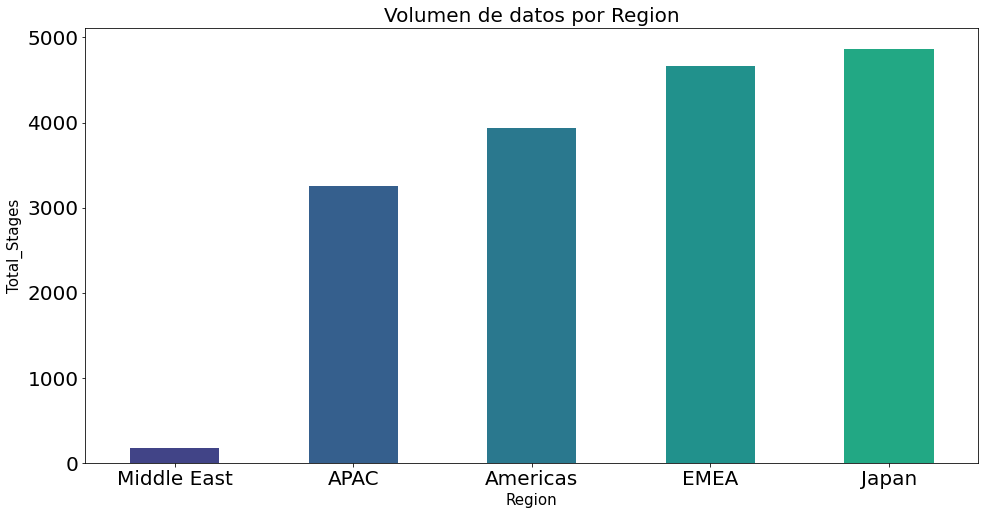

In [110]:
grafico_region_volumen = merge_region[['Region', 'Total_Stages']]
grafico_region_volumen = grafico_region_volumen.set_index('Region')

grafico_region_volumen['Total_Stages'].sort_values().plot( color = colores, kind ='bar',figsize=(16,8),rot= 360,fontsize=20);
ax=plt.gca()
ax.set_title('Volumen de datos por Region',fontsize=20)
ax.set_ylabel('Total_Stages',fontsize=15)
ax.set_xlabel('Region',fontsize=15)

In [29]:
grafico_region = merge_region[['Region', 'porcentaje_ganado']]
grafico_region = grafico_region.drop([4],axis=0)
grafico_region = grafico_region.set_index('Region')
grafico_region

,porcentaje_ganado
Region,
APAC,58.320517
Americas,45.588609
EMEA,53.025751
Japan,68.248100


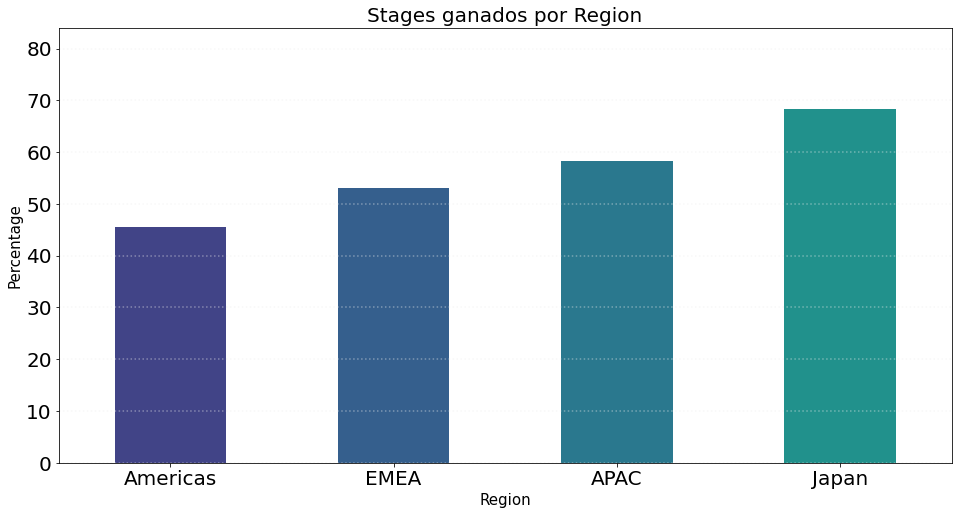

In [111]:
#rot= 360 para que me queden horizontal los nombres de las regiones
grafico = grafico_region['porcentaje_ganado'].sort_values().plot( color = colores, kind ='bar',figsize=(16,8),rot= 360,fontsize=20);
ax=plt.gca()
ax.set_title('Stages ganados por Region',fontsize=20)
ax.set_ylabel('Percentage',fontsize=15)
ax.set_xlabel('Region',fontsize=15)

lineas = grafico.get_yticks()
for i in lineas:
      grafico.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')
        
grafico

AHORA CON TERRITORY=======================================================================================

In [31]:
Territorios = Entrenamiento[['Territory', 'Stage']]
Territorios = Territorios[(Territorios['Stage'] == 'Closed Lost') | (Territorios['Stage'] == 'Closed Won')]
Territorios.head()

,Territory,Stage
0,No especificado,Closed Lost
1,No especificado,Closed Won
2,NW America,Closed Won
3,NW America,Closed Lost
4,NW America,Closed Lost


In [32]:
Casos_Territory = Territorios.groupby('Territory').agg({'Stage' :'count'}).reset_index()
Casos_Territory.sort_values('Stage',ascending = False)

,Territory,Stage
30,Japan,4869
23,Germany,1682
43,NW America,1560
2,Australia,1202
26,India,807
...,...,...
59,Solomon Islands,1
58,Slovenia,1
56,Saudi Arabia,1
40,Monaco,1


Las cantidad de Stages por Territory

In [33]:
Territory_Lost= Territorios[Territorios['Stage'] == 'Closed Lost']
Territory_Lost['Territory'].value_counts()

Japan              1546
Germany             659
NW America          587
No especificado     531
Australia           506
                   ... 
Croatia               1
Monaco                1
Solomon Islands       1
Malta                 1
Georgia               1
Name: Territory, Length: 72, dtype: int64

Los territorios donde se perdieron las stages

In [34]:
Territory_Lost_grouped = Territory_Lost.groupby('Territory').agg({'Stage' :'count'}).reset_index()
Territory_Lost_grouped

,Territory,Stage
0,Albania,2
1,Armenia,2
2,Australia,506
3,Austria,21
4,Belarus,4
...,...,...
67,Turkey,22
68,UAE (Dubai),26
69,Ukraine,5
70,United Kingdom,191


In [35]:
Territory_Won= Territorios[Territorios['Stage'] == 'Closed Won']
Territory_Won['Territory'].value_counts()

Japan              3323
Germany            1023
NW America          973
Australia           696
India               374
Singapore           357
NE America          259
Netherlands         257
No especificado     257
China (PRC)         202
SE America          187
Belgium             187
Spain               181
Italy               149
France              143
Austria             124
United Kingdom      122
Central US          104
Thailand             92
Luxembourg           61
Indonesia            55
SW America           46
Philippines          42
Portugal             34
Jordan               33
Cyprus               32
New Zealand          31
Canada               23
Vietnam              23
Poland               21
Denmark              19
Carribean            13
South Korea          12
Hungary              10
Taiwan                9
Norway                8
Turkey                7
Estonia               7
KSA                   6
Switzerland           6
Malta                 5
Sweden          

In [36]:
Territory_Won_grouped = Territory_Won.groupby('Territory').agg({'Stage' :'count'}).reset_index()
Territory_Won_grouped.head()

,Territory,Stage
0,Australia,696
1,Austria,124
2,Belgium,187
3,Bulgaria,1
4,Cambodia,2


Los territorios donde se ganaron las stages

In [37]:
merge_territory = Casos_Territory.merge(Territory_Won_grouped, on = 'Territory')
merge_territory = merge_territory.rename(columns = {'Stage_x': 'Total_Stages', 'Stage_y': 'Stages_Won'})
merge_territory['porcentaje_ganado'] = regla_de_tres(merge_territory['Total_Stages'],merge_territory['Stages_Won'])
merge_territory.sort_values('Total_Stages',ascending = False).head()

,Territory,Total_Stages,Stages_Won,porcentaje_ganado
19,Japan,4869,3323,68.248100
13,Germany,1682,1023,60.820452
26,NW America,1560,973,62.371795
0,Australia,1202,696,57.903494
16,India,807,374,46.344486


In [38]:
grafico_territory = merge_territory[['Territory', 'porcentaje_ganado']]
grafico_territory = grafico_territory.set_index('Territory')
grafico_territory.head()

,porcentaje_ganado
Territory,
Australia,57.903494
Austria,85.517241
Belgium,65.614035
Bulgaria,20.000000
Cambodia,50.000000


ESTE GRAFICO PODRIA SER DE CANTIDAD Y PORCENTAJE

Text(0.5, 0, 'Territory')

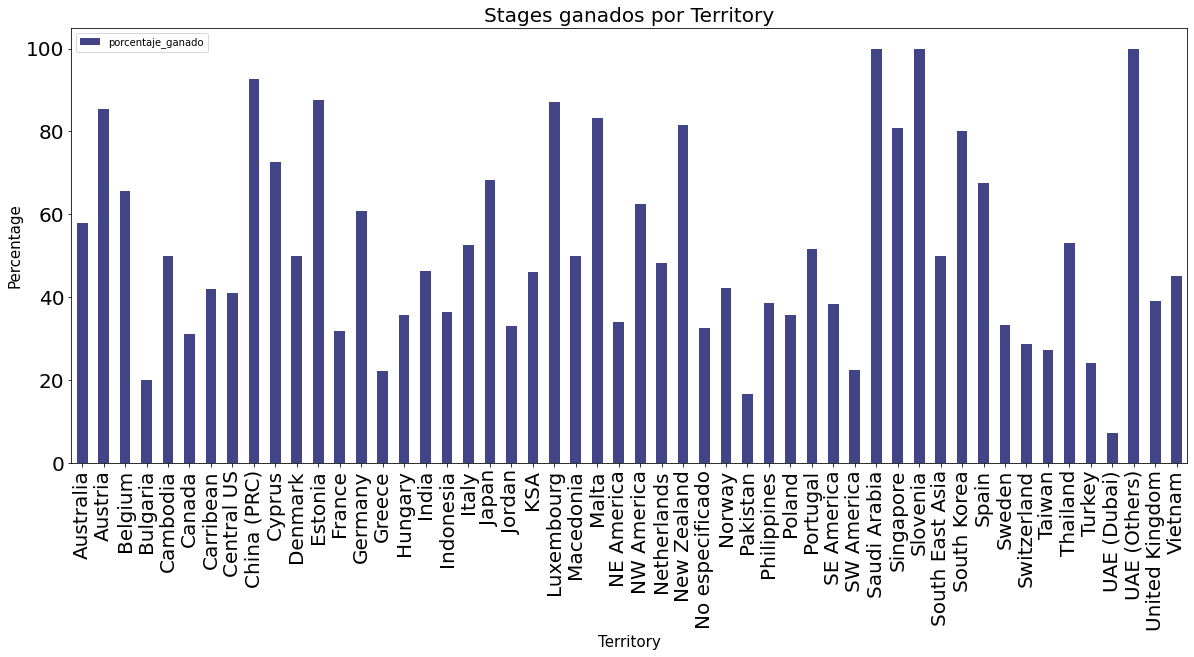

In [112]:
grafico_territory.plot(kind ='bar',figsize=(20,8), color = colores,fontsize=20);
ax=plt.gca()
ax.set_title('Stages ganados por Territory',fontsize=20)
ax.set_ylabel('Percentage',fontsize=15)
ax.set_xlabel('Territory',fontsize=15)

Estos graficos si bien muestran el porcentaje sobre el total, no tiene en cuenta la cantidad de Stages totales, se podria filtrar aun mas.

In [40]:
Casos_Territory_500 = merge_territory[merge_territory['Total_Stages'] >= 500]
Casos_Territory_500

,Territory,Total_Stages,Stages_Won,porcentaje_ganado
0,Australia,1202,696,57.903494
13,Germany,1682,1023,60.820452
16,India,807,374,46.344486
19,Japan,4869,3323,68.248100
25,NE America,760,259,34.078947
26,NW America,1560,973,62.371795
27,Netherlands,532,257,48.308271
29,No especificado,788,257,32.614213


tomo los territorios donde hay mas o igual a 500 casos

In [41]:
grafico_territory_500 = Casos_Territory_500[['Territory', 'porcentaje_ganado']]
grafico_territory_500 = grafico_territory_500.set_index('Territory')
grafico_territory_500.head()

,porcentaje_ganado
Territory,
Australia,57.903494
Germany,60.820452
India,46.344486
Japan,68.248100
NE America,34.078947


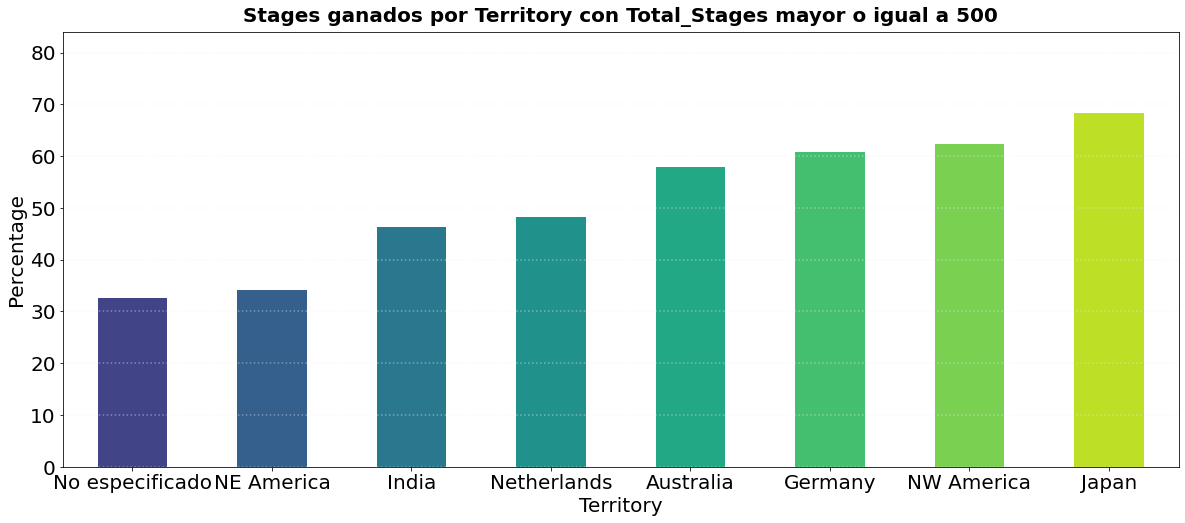

In [109]:
grafico = grafico_territory_500['porcentaje_ganado'].sort_values().plot(kind ='bar',figsize=(20,8),rot=360,title='Stage won by Territory with >= 500 Stages',fontsize = 20, color = colores);
ax=plt.gca()
plt.title('Stages ganados por Territory con Total_Stages mayor o igual a 500', fontweight = 'bold',  fontsize = 20, pad = 10.0)
ax.set_ylabel('Percentage', fontsize = 20)
ax.set_xlabel('Territory', fontsize = 20)
lineas = grafico.get_yticks()
for i in lineas:
      grafico.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')
        
grafico

--------------------EMPIZA EL ANALISIS DE LOS QUARTER

In [43]:
Entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,No especificado,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,No especificado,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [44]:
Quarters = Entrenamiento[['ID','Delivery_Quarter', 'Stage']]
Quarters.head()

,ID,Delivery_Quarter,Stage
0,27761,Q2,Closed Lost
1,27760,Q1,Closed Won
2,27446,Q1,Closed Won
3,16808,Q1,Closed Lost
4,16805,Q1,Closed Lost


In [45]:
mask = Quarters['ID'].duplicated(keep= False)
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: ID, dtype: bool

In [46]:
Quarters[mask]

,ID,Delivery_Quarter,Stage


de esta forma veo que no hay ID duplicados, por lo tanto, para lo que voy a trabajar, no necesito la columna ID

In [47]:
Quarters = Quarters.drop(columns='ID')
Quarters.head()

,Delivery_Quarter,Stage
0,Q2,Closed Lost
1,Q1,Closed Won
2,Q1,Closed Won
3,Q1,Closed Lost
4,Q1,Closed Lost


In [48]:
Quarters['Stage_Counts'] = Quarters['Stage']
Quarters.head()

,Delivery_Quarter,Stage,Stage_Counts
0,Q2,Closed Lost,Closed Lost
1,Q1,Closed Won,Closed Won
2,Q1,Closed Won,Closed Won
3,Q1,Closed Lost,Closed Lost
4,Q1,Closed Lost,Closed Lost


In [49]:
Quarters_Pivoted = Quarters.pivot_table(index = 'Delivery_Quarter', columns = 'Stage', values = 'Stage_Counts', aggfunc = 'count')
Quarters_Pivoted = Quarters_Pivoted.reset_index().rename_axis(None, axis=1)
Quarters_Pivoted

,Delivery_Quarter,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,Q1,2101.0,2194.0,8.0,13.0,1.0
1,Q2,1905.0,2518.0,9.0,8.0,3.0
2,Q3,1813.0,2218.0,1.0,10.0,1.0
3,Q4,1531.0,2603.0,NaN,4.0,6.0


In [50]:
#Quarters_Pivoted = Quarters_Pivoted.set_index('Delivery_Quarter')
#Quarters_Pivoted

In [51]:
Quarters_Pivoted['Porcentaje'] = regla_de_tres(Quarters_Pivoted['Closed Lost'] + Quarters_Pivoted['Closed Won'], Quarters_Pivoted['Closed Won'])
Quarters_Pivoted

,Delivery_Quarter,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Porcentaje
0,Q1,2101.0,2194.0,8.0,13.0,1.0,51.082654
1,Q2,1905.0,2518.0,9.0,8.0,3.0,56.929686
2,Q3,1813.0,2218.0,1.0,10.0,1.0,55.023567
3,Q4,1531.0,2603.0,NaN,4.0,6.0,62.965651


In [52]:
grafico_quarters = Quarters_Pivoted[['Delivery_Quarter', 'Porcentaje']]
grafico_quarters = grafico_quarters.set_index('Delivery_Quarter')
grafico_quarters

,Porcentaje
Delivery_Quarter,
Q1,51.082654
Q2,56.929686
Q3,55.023567
Q4,62.965651


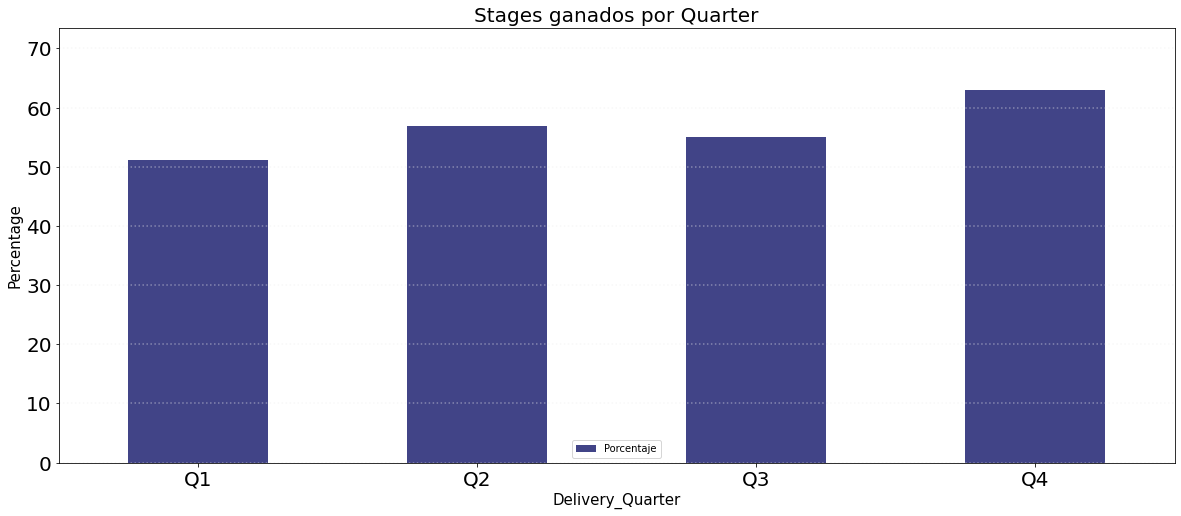

In [113]:
grafico = grafico_quarters.plot(kind ='bar',figsize=(20,8),rot=360, color = colores,fontsize=20);
ax=plt.gca()
ax.set_title('Stages ganados por Quarter',fontsize=20)
ax.set_ylabel('Percentage',fontsize=15)
ax.set_xlabel('Delivery_Quarter',fontsize=15)

lineas = grafico.get_yticks()
for i in lineas:
      grafico.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')
        
grafico

In [54]:
Quarters_Region = Entrenamiento[['Region','Delivery_Quarter', 'Stage']]
Quarters_Region.head()

,Region,Delivery_Quarter,Stage
0,EMEA,Q2,Closed Lost
1,EMEA,Q1,Closed Won
2,Americas,Q1,Closed Won
3,Americas,Q1,Closed Lost
4,Americas,Q1,Closed Lost


In [55]:
Quarters_Region = Quarters_Region[(Quarters_Region['Stage'] == 'Closed Lost') |
                                 (Quarters_Region['Stage'] == 'Closed Won')]
Quarters_Region

,Region,Delivery_Quarter,Stage
0,EMEA,Q2,Closed Lost
1,EMEA,Q1,Closed Won
2,Americas,Q1,Closed Won
3,Americas,Q1,Closed Lost
4,Americas,Q1,Closed Lost
...,...,...,...
16942,EMEA,Q1,Closed Won
16943,EMEA,Q2,Closed Won
16944,EMEA,Q1,Closed Won
16945,Americas,Q2,Closed Lost


In [56]:
Quarters_Region_grouped = Quarters_Region.groupby(['Region','Delivery_Quarter']).agg({'Stage': 'count'})
Quarters_Region_grouped

Stage
Region      Delivery_Quarter       
APAC        Q1                  766
            Q2                  841
            Q3                  797
            Q4                  847
Americas    Q1                  858
            Q2                  963
            Q3                 1064
            Q4                 1048
EMEA        Q1                 1073
            Q2                 1310
            Q3                 1176
            Q4                 1101
Japan       Q1                 1566
            Q2                 1276
            Q3                  926
            Q4                 1101
Middle East Q1                   32
            Q2                   33
            Q3                   68
            Q4                   37

In [57]:
Quarters_Region_Won = Quarters_Region[Quarters_Region['Stage'] == 'Closed Won']
Quarters_Region_Won

,Region,Delivery_Quarter,Stage
1,EMEA,Q1,Closed Won
2,Americas,Q1,Closed Won
7,Americas,Q1,Closed Won
23,APAC,Q1,Closed Won
63,EMEA,Q1,Closed Won
...,...,...,...
16937,EMEA,Q1,Closed Won
16939,EMEA,Q2,Closed Won
16942,EMEA,Q1,Closed Won
16943,EMEA,Q2,Closed Won


In [58]:
Quarters_Region_grouped_Won = Quarters_Region_Won.groupby(['Region','Delivery_Quarter']).agg({'Stage': 'count'})
Quarters_Region_grouped_Won

Stage
Region      Delivery_Quarter       
APAC        Q1                  401
            Q2                  462
            Q3                  500
            Q4                  533
Americas    Q1                  358
            Q2                  458
            Q3                  432
            Q4                  545
EMEA        Q1                  603
            Q2                  716
            Q3                  609
            Q4                  543
Japan       Q1                  822
            Q2                  879
            Q3                  651
            Q4                  971
Middle East Q1                   10
            Q2                    3
            Q3                   26
            Q4                   11

In [59]:
merge_Quarter_Region = Quarters_Region_grouped.merge(Quarters_Region_grouped_Won, on = ['Region', 'Delivery_Quarter'])
merge_Quarter_Region = merge_Quarter_Region.rename(columns = {'Stage_x': 'Total_Stages', 'Stage_y': 'Stages_Won'})
merge_Quarter_Region['porcentaje_ganado'] = regla_de_tres(merge_Quarter_Region['Total_Stages'],merge_Quarter_Region['Stages_Won'])
merge_Quarter_Region

Total_Stages  Stages_Won  porcentaje_ganado
Region      Delivery_Quarter                                             
APAC        Q1                         766         401          52.349869
            Q2                         841         462          54.934602
            Q3                         797         500          62.735257
            Q4                         847         533          62.927981
Americas    Q1                         858         358          41.724942
            Q2                         963         458          47.559709
            Q3                        1064         432          40.601504
            Q4                        1048         545          52.003817
EMEA        Q1                        1073         603          56.197577
            Q2                        1310         716          54.656489
            Q3                        1176         609          51.785714
            Q4                        1101         543          49.318801
Japan       Q1                        1566         822          52.490421
            Q2                        1276         879          68.887147
            Q3                         926         651          70.302376
            Q4                        1101         971          88.192552
Middle East Q1                          32          10          31.250000
            Q2                          33           3           9.090909
            Q3                          68          26          38.235294
            Q4                          37          11          29.729730

In [60]:
grafico_quarters_region = merge_Quarter_Region['porcentaje_ganado'].to_frame()
grafico_quarters_region

porcentaje_ganado
Region      Delivery_Quarter                   
APAC        Q1                        52.349869
            Q2                        54.934602
            Q3                        62.735257
            Q4                        62.927981
Americas    Q1                        41.724942
            Q2                        47.559709
            Q3                        40.601504
            Q4                        52.003817
EMEA        Q1                        56.197577
            Q2                        54.656489
            Q3                        51.785714
            Q4                        49.318801
Japan       Q1                        52.490421
            Q2                        68.887147
            Q3                        70.302376
            Q4                        88.192552
Middle East Q1                        31.250000
            Q2                         9.090909
            Q3                        38.235294
            Q4                        29.729730

In [61]:
grafico_quarters_region = grafico_quarters_region.reset_index().pivot_table(index= 'Delivery_Quarter', columns = 'Region', values= 'porcentaje_ganado')
grafico_quarters_region

Region,APAC,Americas,EMEA,Japan,Middle East
Delivery_Quarter,,,,,
Q1,52.349869,41.724942,56.197577,52.490421,31.250000
Q2,54.934602,47.559709,54.656489,68.887147,9.090909
Q3,62.735257,40.601504,51.785714,70.302376,38.235294
Q4,62.927981,52.003817,49.318801,88.192552,29.729730


Text(0.5, 0, 'Delivery_Quarter')

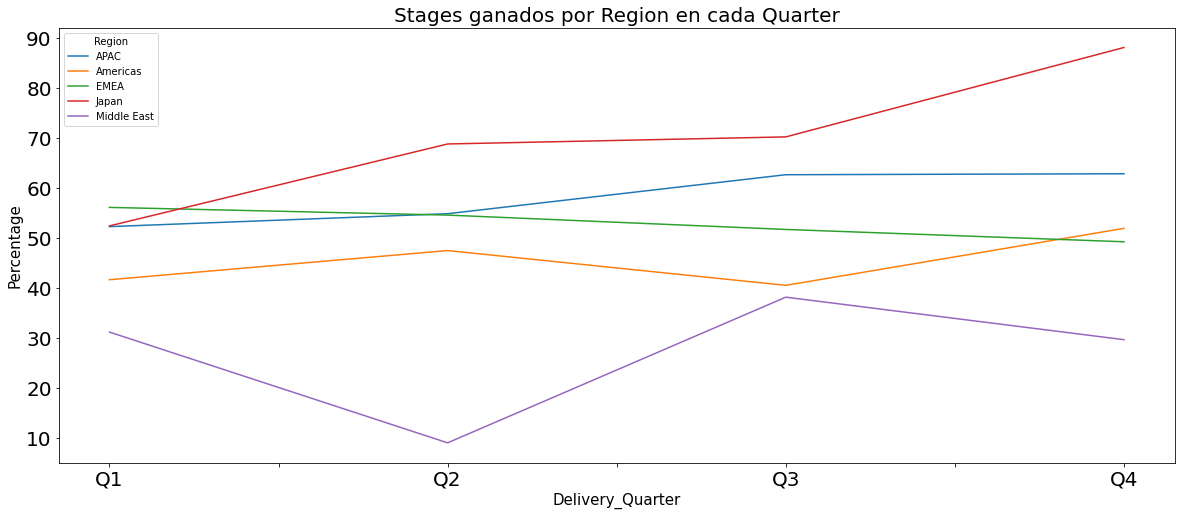

In [114]:
grafico_quarters_region.plot(kind ='line',figsize=(20,8),fontsize=20);
ax=plt.gca()
ax.set_title('Stages ganados por Region en cada Quarter', fontsize = 20)
ax.set_ylabel('Percentage', fontsize = 15)
ax.set_xlabel('Delivery_Quarter' , fontsize = 15)

AHORA CON TERRITORY====================================================================================

In [63]:
Quarters_Territory = Entrenamiento[['Territory','Delivery_Quarter', 'Stage']]
Quarters_Territory.head()

,Territory,Delivery_Quarter,Stage
0,No especificado,Q2,Closed Lost
1,No especificado,Q1,Closed Won
2,NW America,Q1,Closed Won
3,NW America,Q1,Closed Lost
4,NW America,Q1,Closed Lost


In [64]:
Quarters_Territory = Quarters_Territory[(Quarters_Territory['Stage'] == 'Closed Lost') |
                                 (Quarters_Territory['Stage'] == 'Closed Won')]
Quarters_Territory.head()

,Territory,Delivery_Quarter,Stage
0,No especificado,Q2,Closed Lost
1,No especificado,Q1,Closed Won
2,NW America,Q1,Closed Won
3,NW America,Q1,Closed Lost
4,NW America,Q1,Closed Lost


In [65]:
Quarters_Territory_grouped = Quarters_Territory.groupby(['Territory','Delivery_Quarter']).agg({'Stage': 'count'})
#Quarters_Territory_grouped = Quarters_Territory_grouped[Quarters_Territory_grouped['Stage'] >= 100]
Quarters_Territory_grouped.head()

Stage
Territory Delivery_Quarter       
Albania   Q1                    1
          Q2                    1
Armenia   Q2                    2
Australia Q1                  355
          Q2                  310

In [66]:
Quarters_Territory_Won = Quarters_Territory[Quarters_Territory['Stage'] == 'Closed Won']
Quarters_Territory_Won.head()

,Territory,Delivery_Quarter,Stage
1,No especificado,Q1,Closed Won
2,NW America,Q1,Closed Won
7,NW America,Q1,Closed Won
23,India,Q1,Closed Won
63,Germany,Q1,Closed Won


In [67]:
Quarters_Territory_grouped_Won = Quarters_Territory_Won.groupby(['Territory','Delivery_Quarter']).agg({'Stage': 'count'})
Quarters_Territory_grouped_Won.head()

Stage
Territory Delivery_Quarter       
Australia Q1                  186
          Q2                  178
          Q3                  119
          Q4                  213
Austria   Q1                   37

In [68]:
merge_Quarter_Territory = Quarters_Territory_grouped.merge(Quarters_Territory_grouped_Won, on = ['Territory', 'Delivery_Quarter'])
merge_Quarter_Territory = merge_Quarter_Territory.rename(columns = {'Stage_x': 'Total_Stages', 'Stage_y': 'Stages_Won'})
merge_Quarter_Territory['porcentaje_ganado'] = regla_de_tres(merge_Quarter_Territory['Total_Stages'],merge_Quarter_Territory['Stages_Won'])
merge_Quarter_Territory = merge_Quarter_Territory[merge_Quarter_Territory['Total_Stages'] >= 100]
merge_Quarter_Territory

Total_Stages  Stages_Won  porcentaje_ganado
Territory       Delivery_Quarter                                             
Australia       Q1                         355         186          52.394366
                Q2                         310         178          57.419355
                Q3                         220         119          54.090909
                Q4                         317         213          67.192429
France          Q1                         112          43          38.392857
                Q2                         139          39          28.057554
                Q3                         108          36          33.333333
Germany         Q1                         318         214          67.295597
                Q2                         470         285          60.638298
                Q3                         440         274          62.272727
                Q4                         454         250          55.066079
India           Q1                         188          86          45.744681
                Q2                         230          91          39.565217
                Q3                         187          90          48.128342
                Q4                         202         107          52.970297
Japan           Q1                        1566         822          52.490421
                Q2                        1276         879          68.887147
                Q3                         926         651          70.302376
                Q4                        1101         971          88.192552
NE America      Q1                         156          62          39.743590
                Q2                         177          43          24.293785
                Q3                         215          56          26.046512
                Q4                         212          98          46.226415
NW America      Q1                         288         182          63.194444
                Q2                         439         294          66.970387
                Q3                         415         246          59.277108
                Q4                         418         251          60.047847
Netherlands     Q2                         137          78          56.934307
                Q3                         169          75          44.378698
                Q4                         137          63          45.985401
No especificado Q1                         257          76          29.571984
                Q2                         178          59          33.146067
                Q3                         183          61          33.333333
                Q4                         170          61          35.882353
SE America      Q2                         105          41          39.047619
                Q3                         158          49          31.012658
                Q4                         140          71          50.714286
Singapore       Q3                         152         133          87.500000
                Q4                         117          93          79.487179
United Kingdom  Q1                         116          53          45.689655

In [69]:
grafico_quarters_territory = merge_Quarter_Territory['porcentaje_ganado'].to_frame()
grafico_quarters_territory

porcentaje_ganado
Territory       Delivery_Quarter                   
Australia       Q1                        52.394366
                Q2                        57.419355
                Q3                        54.090909
                Q4                        67.192429
France          Q1                        38.392857
                Q2                        28.057554
                Q3                        33.333333
Germany         Q1                        67.295597
                Q2                        60.638298
                Q3                        62.272727
                Q4                        55.066079
India           Q1                        45.744681
                Q2                        39.565217
                Q3                        48.128342
                Q4                        52.970297
Japan           Q1                        52.490421
                Q2                        68.887147
                Q3                        70.302376
                Q4                        88.192552
NE America      Q1                        39.743590
                Q2                        24.293785
                Q3                        26.046512
                Q4                        46.226415
NW America      Q1                        63.194444
                Q2                        66.970387
                Q3                        59.277108
                Q4                        60.047847
Netherlands     Q2                        56.934307
                Q3                        44.378698
                Q4                        45.985401
No especificado Q1                        29.571984
                Q2                        33.146067
                Q3                        33.333333
                Q4                        35.882353
SE America      Q2                        39.047619
                Q3                        31.012658
                Q4                        50.714286
Singapore       Q3                        87.500000
                Q4                        79.487179
United Kingdom  Q1                        45.689655

In [70]:
grafico_quarters_territory = grafico_quarters_territory.reset_index().pivot_table(index= 'Delivery_Quarter', columns = 'Territory', values= 'porcentaje_ganado')
grafico_quarters_territory = grafico_quarters_territory.fillna(0)
grafico_quarters_territory

Territory,Australia,France,Germany,India,Japan,NE America,NW America,Netherlands,No especificado,SE America,Singapore,United Kingdom
Delivery_Quarter,,,,,,,,,,,,
Q1,52.394366,38.392857,67.295597,45.744681,52.490421,39.743590,63.194444,0.000000,29.571984,0.000000,0.000000,45.689655
Q2,57.419355,28.057554,60.638298,39.565217,68.887147,24.293785,66.970387,56.934307,33.146067,39.047619,0.000000,0.000000
Q3,54.090909,33.333333,62.272727,48.128342,70.302376,26.046512,59.277108,44.378698,33.333333,31.012658,87.500000,0.000000
Q4,67.192429,0.000000,55.066079,52.970297,88.192552,46.226415,60.047847,45.985401,35.882353,50.714286,79.487179,0.000000


In [71]:
grafico_quarters_territory = grafico_quarters_territory.drop(['France','Netherlands','SE America','United Kingdom','Singapore'],axis=1)
grafico_quarters_territory

Territory,Australia,Germany,India,Japan,NE America,NW America,No especificado
Delivery_Quarter,,,,,,,
Q1,52.394366,67.295597,45.744681,52.490421,39.743590,63.194444,29.571984
Q2,57.419355,60.638298,39.565217,68.887147,24.293785,66.970387,33.146067
Q3,54.090909,62.272727,48.128342,70.302376,26.046512,59.277108,33.333333
Q4,67.192429,55.066079,52.970297,88.192552,46.226415,60.047847,35.882353


Text(0.5, 0, 'Delivery_Quarter')

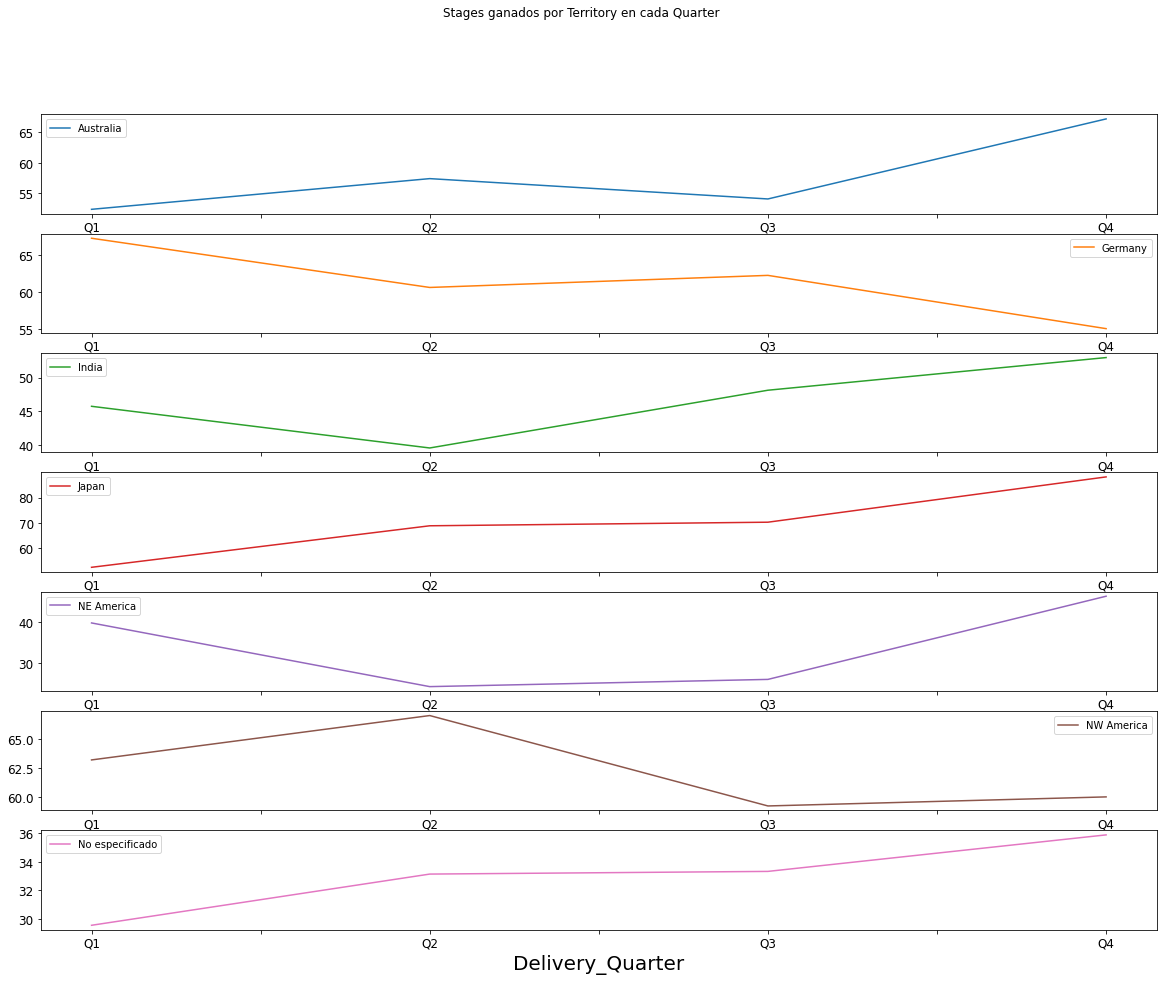

In [117]:
grafico_quarters_territory.plot(kind ='line',figsize=(20,15),title='Stages ganados por Territory en cada Quarter',subplots = True, sharex=False,fontsize=12);
ax=plt.gca()
ax.set_xlabel('Delivery_Quarter',fontsize=20)